# Diode Waveform with bunches every 8ns (Data length is about 4us)

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/RefCurve_2023-10-18_8ns_1ps.npy'

waveform=np.load(path)

(0.0, 110.0)

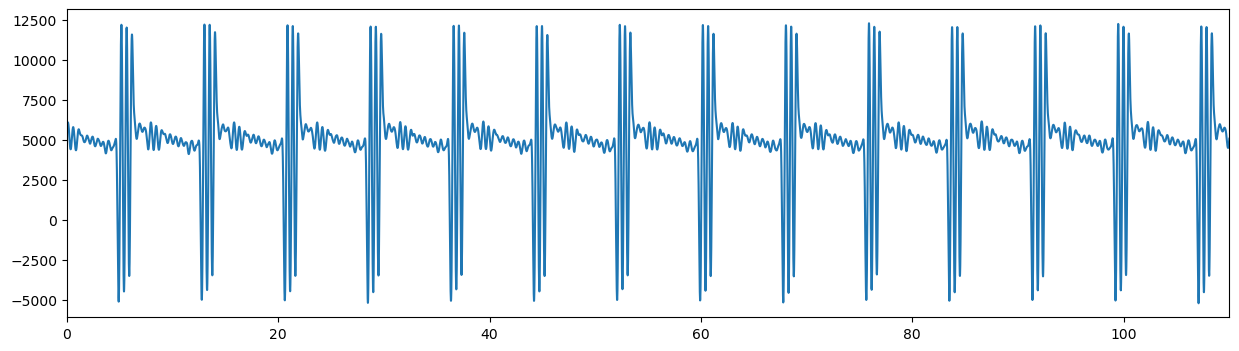

In [29]:
timeBin = 1E-3 # Unit of ns

timestep=np.arange(0,len(waveform))*timeBin
plt.figure(figsize=(15,4))
plt.plot(timestep,waveform)
plt.xlim(0,110)

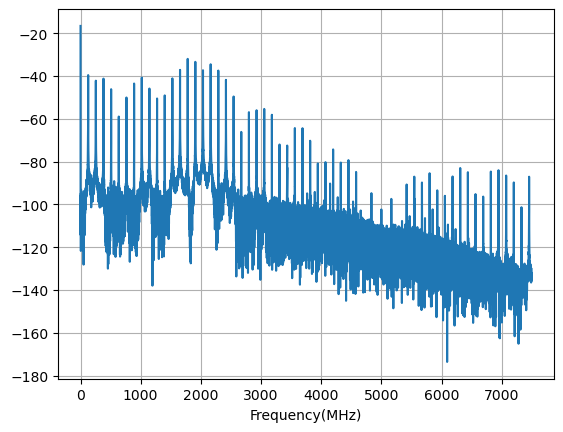

In [27]:
#FFT
size    = len(waveform) # Number of data points in the file
timeBin = 1E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")

plt.grid()

# Interporate to 3054MSPS

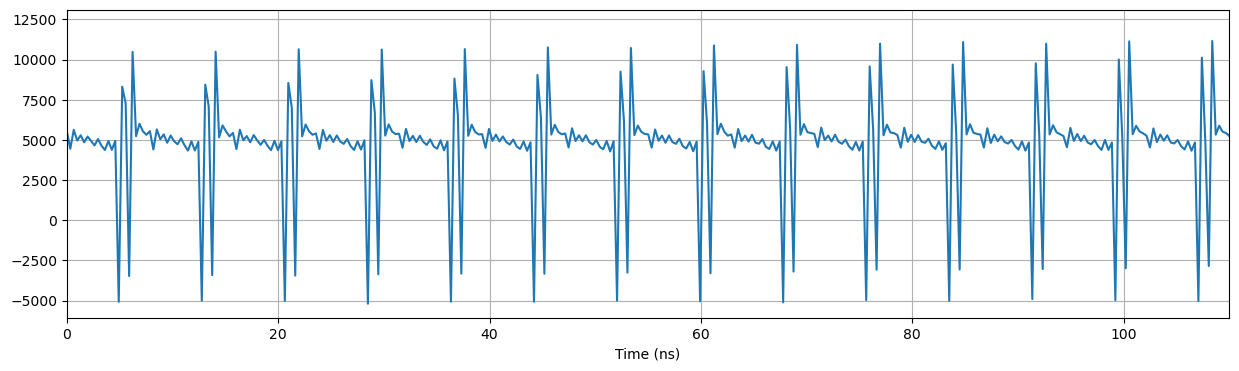

In [30]:
#  linear interpolation for this data at 3.054 GSPS
newTimeBin = 1.0/(0.509*6.0) # Unit of ns for 3.054 GSPS
newSize    = math.floor(len(waveform)*3054e6/1e12)
newTimeSteps = np.linspace(0, newTimeBin*(newSize-1), num=newSize)

newwaveform = np.int16(np.interp(newTimeSteps, timestep, waveform))
# Plot the time waveform (RFSoC rate)
plt.figure(figsize=(15,4))
plt.plot(newTimeSteps,newwaveform)
plt.xlabel("Time (ns)")
plt.xlim(0,110)
plt.grid()

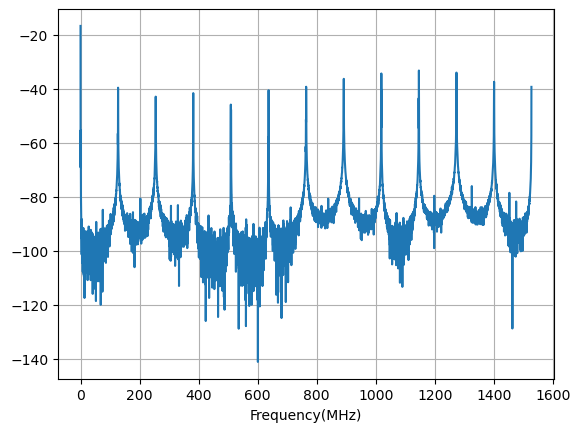

In [20]:
#FFT
size    = len(newwaveform) # Number of data points in the file
timeBin = 1000/3054 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(newwaveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps,mag)
plt.xlabel("Frequency(MHz)")
plt.grid()